# Вопросы по числу обусловленности

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Число-обусловленности" data-toc-modified-id="Число-обусловленности-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Число обусловленности</a></span></li><li><span><a href="#Регуляризация" data-toc-modified-id="Регуляризация-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регуляризация</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [3]:
# import warnings
# warnings.filterwarnings('ignore')

# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Число обусловленности

1. **Вопрос**: В рассматриваемом на лекции примере число обусловленности $\mu(A)=22.15$. Но выше мы нашли, что относительная погрешность увеличилась в $14.88$ раз. Почему так произошло? При каком условии оценка, сделанная по числу обусловленности, будет достигаться? \
   **Ответ**: Максимальная оценка будет достигаться, когда вектор $\mathbf{b}$ будет параллелен первому сингулярному вектору (первой главной компоненте). Минимальная &mdash; когда второму сингулярному вектору (см. иллюстрации ниже).

In [4]:
A = np.array([[1.0, 0.9],
              [1.0, 1.1]])

origin = [[0,0], [0,0]] # origin point

In [5]:
def make_decor(ax, xlims=None, ylims=None):
    for axi in ax:
        axi.axhline(y=0, color='k')
        axi.axvline(x=0, color='k')
        axi.set_xlabel('$x_1$')
        axi.set_ylabel('$x_2$', rotation=0, ha='right')
        if(xlims):
            axi.set_xlim(xlims)
            axi.set_ylim(ylims)
        axi.set_aspect('equal')
        axi.set_axisbelow(True)

In [6]:
lmbd, U = LA.eig(A)
print('lambda = ', np.round(lmbd, 3))
print(round(lmbd[1]/lmbd[0], 4))

lambda =  [0.1 2. ]
20.0


In [7]:
U, sgm, Vt = LA.svd(A)
mu = sgm[0]/sgm[1]
print('sigma = ', np.round(sgm, 5))
print('mu(A) = ', round(mu, 5))

sigma =  [2.0025  0.09987]
mu(A) =  20.05012


In [8]:
# Creating vector b (3 variants)n
alpha = np.radians(45)
b = np.atleast_2d([np.cos(alpha), np.sin(alpha)]).T  # 1
# b = -np.atleast_2d(U[:,0]).T  # 2
# b = np.atleast_2d(U[:,1]).T  # 3
print('b:\n', b)

b:
 [[0.70710678]
 [0.70710678]]


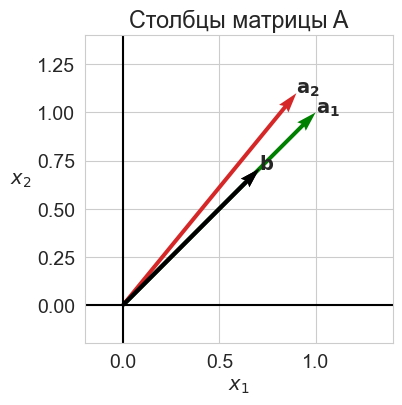

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.subplots_adjust(wspace=0.4)
make_decor([ax], [-0.2, 1.4], [-0.2, 1.4])

# Plotting A
ax.quiver(*origin, A[0,:], A[1,:], color=['g', cm(3)],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.quiver(*origin, b[0,:], b[1,:], color=['k'],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.set_title("Столбцы матрицы A")
ax.text(*A[:,0], "$\mathbf{a_1}$")
ax.text(*A[:,1], "$\mathbf{a_2}$")
ax.text(*b, "$\mathbf{b}$")

plt.show()

In [10]:
# Creating perturbed vectors B
n = 500
np.random.seed(42)
r = 0.1*np.random.rand(n)
phi = 2*np.pi*np.random.rand(n)
B1 = b[0] + r*np.cos(phi)
B2 = b[1] + r*np.sin(phi)
B = np.vstack((B1, B2))

In [11]:
# Solving system
A_inv = LA.inv(A)
x = A_inv @ b
print('x:\n', x)

X = A_inv @ B

x:
 [[0.70710678]
 [0.        ]]


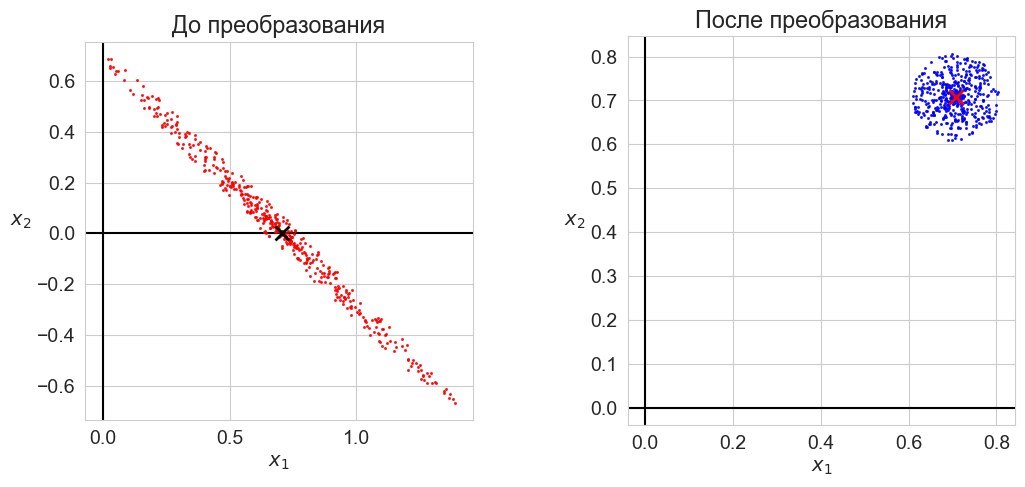

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(wspace=0.4)
xlims = [-0.3, 1.7]
ylims = [-1.0, 1.0]
# make_decor(ax, xlims, ylims)
make_decor(ax)

# Plotting X
ax[0].plot(X[0,:], X[1,:], 'ro', ms=1.2, alpha=0.8)
ax[0].plot(x[0], x[1], 'kx', ms=10, mew=2)
ax[0].set_title("До преобразования")

# Plotting B
ax[1].plot(B[0, :], B[1, :], 'bo', ms=1.2, alpha=0.8)
ax[1].plot(b[0], b[1], 'rx', ms=10, mew=2)
ax[1].set_title("После преобразования")

plt.show()

In [13]:
dx = X - x
db = B - b

k1 = np.array(list(map(LA.norm, db.T)))
k2 = np.array(list(map(LA.norm, dx.T)))

print(f'Максимальное увеличение возмущения max(dx/db) = {max(k2/k1):.5g}')

print(f'Норма вектора b = {LA.norm(b):.5g}')
print(f'Норма вектора x = {LA.norm(x):.5g}')

k1 = np.array(list(map(LA.norm, db.T))) / LA.norm(b)
k2 = np.array(list(map(LA.norm, dx.T))) / LA.norm(x)

print(f'Максимальное относительное увеличение возмущения max(dx/x : db/b) = {max(k2/k1):.5g}')

Максимальное увеличение возмущения max(dx/db) = 10.013
Норма вектора b = 1
Норма вектора x = 0.70711
Максимальное относительное увеличение возмущения max(dx/x : db/b) = 14.16


1. **Вопрос**: Если известен вектор $\mathbf{b}$, как сделать более точную оценку возрастания относительной погрешности? \
   **Ответ**: Оценка даётся по формуле
   $$ \frac{\|\delta \mathbf{x}\|}{\|\mathbf{x}\|} \le \frac{\|A^{-1}\| \|\mathbf{b}\|}{\|A^{-1} \mathbf{b}\|} \frac{\|\delta \mathbf{b}\|}{\|\mathbf{b}\|}. $$
   Величина $\nu(A, b) = \frac{\|A^{-1}\| \|\mathbf{b}\|}{\|A^{-1} \mathbf{b}\|}$ называется *числом обусловленности системы при заданной правой части* и показывает, во сколько раз может возрасти относительная погрешность решения по сравнению с погрешностью правой части при решении системы $A\mathbf{x} = \mathbf{b}$.

$$ \nu = \frac{1}{\sigma_1} \frac{\|\mathbf{b}\|}{\|\mathbf{x}\|}  $$

In [14]:
nu = 1 / sgm[1] * LA.norm(b) / LA.norm(x)
print('|b| = |Ax| = ', LA.norm(b))
print('|A|*|x| = ', sgm[0]*LA.norm(x))
print('nu = ', round(nu, 4))

|b| = |Ax| =  1.0
|A|*|x| =  1.4159846397196105
nu =  14.1598


---

## Регуляризация

1. **Вопрос**: Для задачи, рассматриваемой выше, метод LASSO соответствует выбору одного из двух векторов, SVD &mdash; замене базиса из двух векторов на один, соответствующий максимальному сингулярному числу.
   Какая геометрическая интерпретация у гребневой регрессии?

**1. Обычное СЛАУ**

In [67]:
print(x)

[[0.70710678]
 [0.        ]]


**2. OLS**

In [68]:
print(A)
AtA = A.T @ A
print(AtA)
Atb = A.T @ b
print(Atb)

[[1.  0.9]
 [1.  1.1]]
[[2.   2.  ]
 [2.   2.02]]
[[1.41421356]
 [1.41421356]]


In [69]:
lmbd, U = LA.eig(AtA)
# print(U)
# print(lmbd)

In [70]:
AtA_root = U @ np.diag(lmbd**0.5) @ U.T
print(AtA_root)

[[1.04643329 0.95130299]
 [0.95130299 1.05594632]]


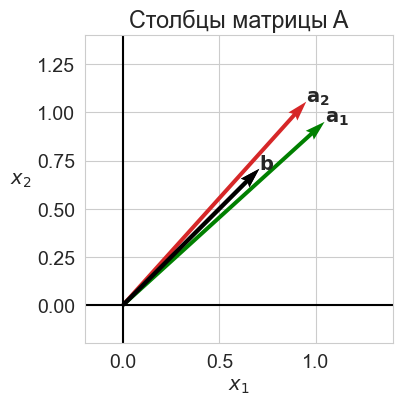

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.subplots_adjust(wspace=0.4)
make_decor([ax], [-0.2, 1.4], [-0.2, 1.4])
# make_decor([ax])

# Plotting A
ax.quiver(*origin, AtA_root[0,:], AtA_root[1,:], color=['g', cm(3)],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.quiver(*origin, b[0,:], b[1,:], color=['k'],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.set_title("Столбцы матрицы A")
ax.text(*AtA_root[:,0], "$\mathbf{a_1}$")
ax.text(*AtA_root[:,1], "$\mathbf{a_2}$")
ax.text(*b, "$\mathbf{b}$")

plt.show()

In [72]:
x_OLS = LA.solve(AtA, Atb)
print(x_OLS)

[[0.70710678]
 [0.        ]]


**3. Ridge**

In [73]:
delta = 1e-1
AtA_ridge = AtA + delta**2*np.identity(2)
print(AtA_ridge)

[[2.01 2.  ]
 [2.   2.03]]


In [74]:
lmbd, U = LA.eig(AtA_ridge)
# print(U)
# print(lmbd)

In [75]:
AtA_ridge_root = U @ np.diag(lmbd**0.5) @ U.T
print(A)
print(AtA_root)
print(AtA_ridge_root)

[[1.  0.9]
 [1.  1.1]]
[[1.04643329 0.95130299]
 [0.95130299 1.05594632]]
[[1.06850736 0.93182188]
 [0.93182188 1.07782558]]


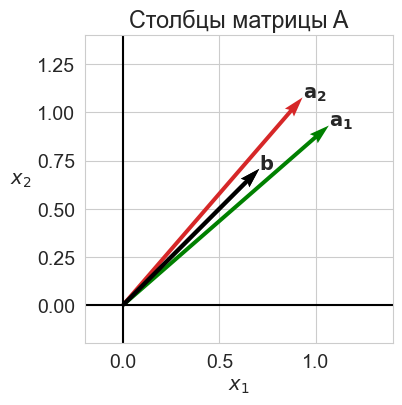

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.subplots_adjust(wspace=0.4)
make_decor([ax], [-0.2, 1.4], [-0.2, 1.4])

# Plotting A
ax.quiver(*origin, AtA_ridge_root[0,:], AtA_ridge_root[1,:], color=['g', cm(3)],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.quiver(*origin, b[0,:], b[1,:], color=['k'],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.set_title("Столбцы матрицы A")
ax.text(*AtA_ridge_root[:,0], "$\mathbf{a_1}$")
ax.text(*AtA_ridge_root[:,1], "$\mathbf{a_2}$")
ax.text(*b, "$\mathbf{b}$")

plt.show()

Обусловленности матриц

In [89]:
print(LA.cond(A))
print(LA.cond(AtA))
print(LA.cond(AtA_ridge))

20.050124999218745
402.00751248428196
201.2528144379677


In [78]:
x_ridge = LA.solve(AtA_ridge, Atb)
AtB = A.T @ B
X = LA.solve(AtA_ridge, AtB)

In [79]:
print(x)
print(x_OLS)
print(x_ridge)

[[0.70710678]
 [0.        ]]
[[0.70710678]
 [0.        ]]
[[0.52834878]
 [0.17611626]]


In [80]:
print(A@x)
print(A@x_OLS)
print(A@x_ridge)

[[0.70710678]
 [0.70710678]]
[[0.70710678]
 [0.70710678]]
[[0.68685341]
 [0.72207666]]


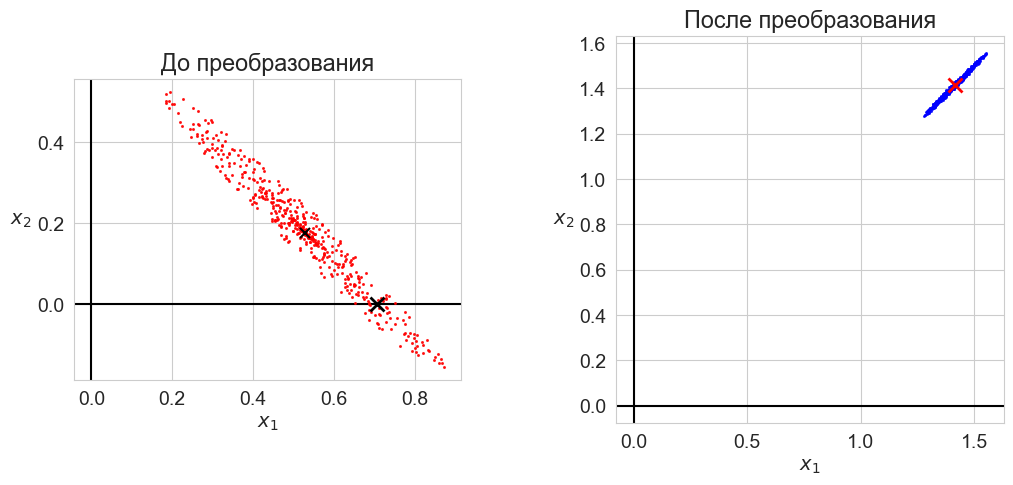

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(wspace=0.4)
xlims = [-0.3, 1.7]
ylims = [-1.0, 1.0]
# make_decor(ax, xlims, ylims)
make_decor(ax)

# Plotting X
ax[0].plot(X[0,:], X[1,:], 'ro', ms=1.2, alpha=0.8)
ax[0].plot(x_ridge[0], x_ridge[1], 'kx', ms=7, mew=1.5)
ax[0].plot(x[0], x[1], 'kx', ms=10, mew=2)
ax[0].set_title("До преобразования")

# Plotting B
ax[1].plot(AtB[0, :], AtB[1, :], 'bo', ms=1.2, alpha=0.8)
ax[1].plot(Atb[0], Atb[1], 'rx', ms=10, mew=2)
ax[1].set_title("После преобразования")

plt.show()

In [90]:
dx = X - x_ridge
db = AtB - Atb

k1 = np.array(list(map(LA.norm, db.T)))
k2 = np.array(list(map(LA.norm, dx.T)))

print(f'Максимальное увеличение возмущения max(dx/db) = {max(k2/k1):.5g}')
print(f'Максимальное сжатие возмущения min(dx/db) = {min(k2/k1):.5g}')

print(f'Норма вектора b = {LA.norm(Atb):.5g}')
print(f'Норма вектора x = {LA.norm(x_ridge):.5g}')

k1 /= LA.norm(Atb)
k2 /= LA.norm(x_ridge)

print(f'Максимальное относительное увеличение возмущения max(dx/x : db/b) = {max(k2/k1):.5g}')
print(f'Максимальное относительное сжатие возмущения min(dx/x : db/b) = {min(k2/k1):.5g}')

Максимальное увеличение возмущения max(dx/db) = 50.051
Максимальное сжатие возмущения min(dx/db) = 0.24885
Норма вектора b = 2
Норма вектора x = 0.55693
Максимальное относительное увеличение возмущения max(dx/x : db/b) = 179.74
Максимальное относительное сжатие возмущения min(dx/x : db/b) = 0.89364


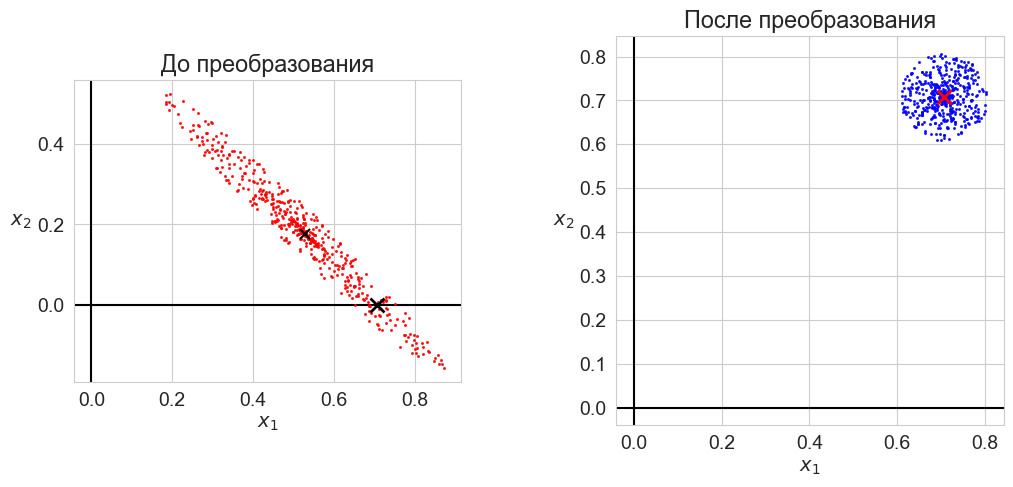

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(wspace=0.4)
xlims = [-0.3, 1.7]
ylims = [-1.0, 1.0]
# make_decor(ax, xlims, ylims)
make_decor(ax)

# Plotting X
ax[0].plot(X[0,:], X[1,:], 'ro', ms=1.2, alpha=0.8)
ax[0].plot(x_ridge[0], x_ridge[1], 'kx', ms=7, mew=1.5)
ax[0].plot(x[0], x[1], 'kx', ms=10, mew=2)
ax[0].set_title("До преобразования")

# Plotting B
ax[1].plot(B[0, :], B[1, :], 'bo', ms=1.2, alpha=0.8)
ax[1].plot(b[0], b[1], 'rx', ms=10, mew=2)
ax[1].set_title("После преобразования")

plt.show()

In [91]:
dx = X - x_ridge
db = B - b

k1 = np.array(list(map(LA.norm, db.T)))
k2 = np.array(list(map(LA.norm, dx.T)))

print(f'Максимальное увеличение возмущения max(dx/db) = {max(k2/k1):.5g}')
print(f'Максимальное сжатие возмущения min(dx/db) = {min(k2/k1):.5g}')

print(f'Норма вектора b = {LA.norm(b):.5g}')
print(f'Норма вектора x = {LA.norm(x_ridge):.5g}')

k1 = np.array(list(map(LA.norm, db.T))) / LA.norm(b)
k2 = np.array(list(map(LA.norm, dx.T))) / LA.norm(x_ridge)

print(f'Максимальное относительное увеличение возмущения max(dx/x : db/b) = {max(k2/k1):.5g}')
print(f'Максимальное относительное сжатие возмущения min(dx/x : db/b) = {min(k2/k1):.5g}')

Максимальное увеличение возмущения max(dx/db) = 5
Максимальное сжатие возмущения min(dx/db) = 0.49831
Норма вектора b = 1
Норма вектора x = 0.55693
Максимальное относительное увеличение возмущения max(dx/x : db/b) = 8.9778
Максимальное относительное сжатие возмущения min(dx/x : db/b) = 0.89475


Формула для числа обусловленности в гребневой регрессии:
$$ \mu_{ridge} = \frac{\sigma_{max,\,ridge}}{\sigma_{min,\,ridge}} = \frac{(\sigma_{max}^2 + \delta^2)}{\sigma_{max}} \frac{\sigma_{min}}{(\sigma_{min}^2 + \delta^2)}. $$

In [98]:
U, sgm, Vt = LA.svd(A)
s1, s2 = sgm
print(sgm)

[2.00250468 0.09987492]


In [87]:
s1, s2 = sgm
m1 = s1/s2
print('mu(At) =', m1)

m2 = (s1**2 + delta**2) / (s2**2 + delta**2)
print('mu(AtA_ridge) =', m2)

print('mu_ridge = ', m2/m1)

mu(At) = 20.05012499921875
mu(AtA_ridge) = 201.25281443796692
mu_ridge =  10.037484277320402


**4. Ridge A**

In [30]:
delta_2 = delta
# delta_2 = 0
U, sgm, Vt = LA.svd(A)
A_ridge = U @ (np.diag(sgm) + delta_2*np.identity(2)) @ Vt
print(A_ridge)

[[1.09988681 0.89524349]
 [1.00475651 1.19988681]]


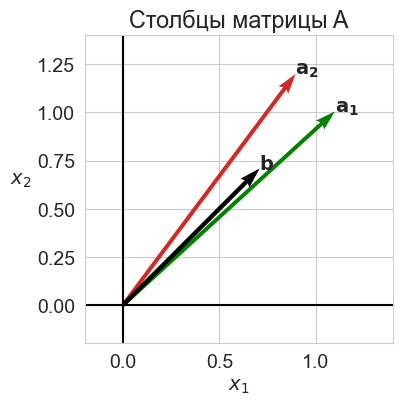

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.subplots_adjust(wspace=0.4)
make_decor([ax], [-0.2, 1.4], [-0.2, 1.4])

# Plotting A
ax.quiver(*origin, A_ridge[0,:], A_ridge[1,:], color=['g', cm(3)],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.quiver(*origin, b[0,:], b[1,:], color=['k'],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.set_title("Столбцы матрицы A")
ax.text(*A_ridge[:,0], "$\mathbf{a_1}$")
ax.text(*A_ridge[:,1], "$\mathbf{a_2}$")
ax.text(*b, "$\mathbf{b}$")

plt.show()

In [59]:
x_ridge = LA.solve(A_ridge, b)
X = LA.solve(A_ridge, B)

In [60]:
print(x)
print(x_ridge)
print(b)
print(A@x_ridge)

[[0.70710678]
 [0.        ]]
[[0.5126033]
 [0.1600695]]
[[0.70710678]
 [0.70710678]]
[[0.65666584]
 [0.68867974]]


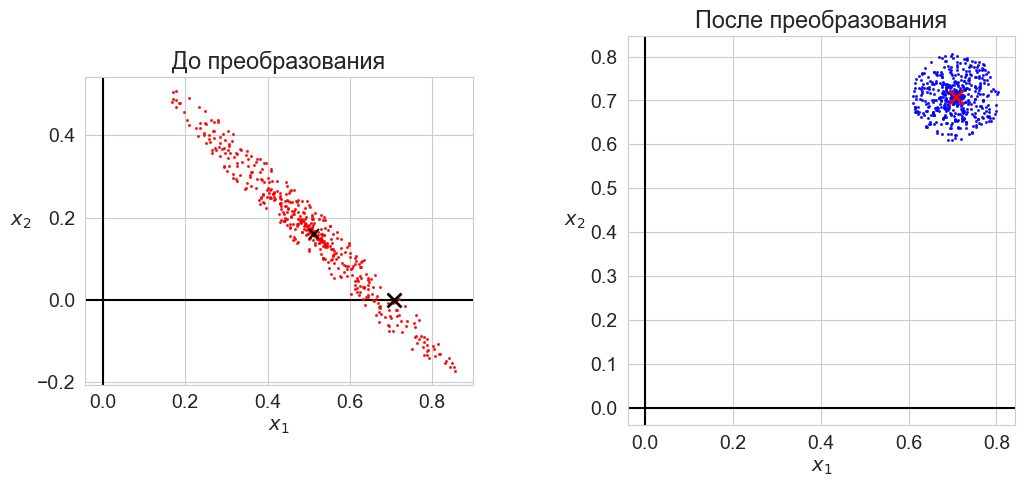

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(wspace=0.4)
xlims = [-0.3, 1.7]
ylims = [-1.0, 1.0]
# make_decor(ax, xlims, ylims)
make_decor(ax)

# Plotting X
ax[0].plot(X[0,:], X[1,:], 'ro', ms=1.2, alpha=0.8)
ax[0].plot(x_ridge[0], x_ridge[1], 'kx', ms=7, mew=1.5)
ax[0].plot(x[0], x[1], 'kx', ms=10, mew=2)
ax[0].set_title("До преобразования")

# Plotting B
ax[1].plot(B[0, :], B[1, :], 'bo', ms=1.2, alpha=0.8)
ax[1].plot(b[0], b[1], 'rx', ms=10, mew=2)
ax[1].set_title("После преобразования")

plt.show()

In [62]:
dx = X - x_ridge
db = B - b

k1 = np.array(list(map(LA.norm, db.T)))
k2 = np.array(list(map(LA.norm, dx.T)))

print(f'Максимальное увеличение возмущения max(dx/db) = {max(k2/k1):.5g}')
print(f'Максимальное сжатие возмущения min(dx/db) = {min(k2/k1):.5g}')

print(f'Норма вектора b = {LA.norm(b):.5g}')
print(f'Норма вектора x = {LA.norm(x_ridge):.5g}')

k1 = np.array(list(map(LA.norm, db.T))) / LA.norm(b)
k2 = np.array(list(map(LA.norm, dx.T))) / LA.norm(x_ridge)

print(f'Максимальное относительное увеличение возмущения max(dx/x : db/b) = {max(k2/k1):.5g}')
print(f'Максимальное относительное сжатие возмущения max(dx/x : db/b) = {min(k2/k1):.5g}')

Максимальное увеличение возмущения max(dx/db) = 5.0031
Максимальное сжатие возмущения min(dx/db) = 0.47581
Норма вектора b = 1
Норма вектора x = 0.53701
Максимальное относительное увеличение возмущения max(dx/x : db/b) = 9.3166
Максимальное относительное сжатие возмущения max(dx/x : db/b) = 0.88603


In [63]:
print(LA.cond(A_ridge))

10.519101919744429


In [64]:
m_ridge_A = (s1+delta_2) / (s2+delta_2)
print(m_ridge_A)

10.519101919744427
